In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nb
from sklearn.linear_model import LinearRegression


### Data pre-processing

In [60]:
df = pd.read_csv("FPT Historical Data_3.csv")

In [61]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06/17/2024,"128,800.0","131,000.0","131,400.0","128,500.0",4.87M,-1.68%
1,06/14/2024,"131,000.0","130,100.0","132,600.0","129,000.0",6.41M,0.77%
2,06/13/2024,"130,000.0","133,700.0","133,800.0","130,000.0",8.14M,-1.52%
3,06/12/2024,"132,000.0","127,900.0","132,700.0","127,800.0",11.22M,-9.90%
4,06/11/2024,"146,500.0","144,300.0","146,500.0","143,100.0",6.33M,1.74%


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      350 non-null    object
 1   Price     350 non-null    object
 2   Open      350 non-null    object
 3   High      350 non-null    object
 4   Low       350 non-null    object
 5   Vol.      350 non-null    object
 6   Change %  350 non-null    object
dtypes: object(7)
memory usage: 19.3+ KB


In [63]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,350,350,350,350,350,350,350
unique,350,241,233,240,232,268,219
top,06/17/2024,"68,499.0","67,308.0","68,499.0","95,300.0",1.09M,0.00%
freq,1,7,6,6,6,5,23


In [64]:
# Normalize the price, Open, High, Low
df.Price = df.Price.str.replace(',', '').astype(float)
df.Open = df.Open.str.replace(',', '').astype(float)
df.High = df.High.str.replace(',', '').astype(float)
df.Low = df.Low.str.replace(',', '').astype(float)


In [65]:
input_string = "4.79M"
input_string[0:-1]

'4.79'

In [66]:
def vol_replace(string_input):
    if string_input[-1] == "M":
        output = float(string_input[0:-1])*1000000
    elif string_input[-1] == "K":
        output = float(string_input[0:-1])*1000
    else:
        output = float(string_input)
    return output

df["Vol."] = df["Vol."].apply(vol_replace)

In [67]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06/17/2024,128800.0,131000.0,131400.0,128500.0,4870000.0,-1.68%
1,06/14/2024,131000.0,130100.0,132600.0,129000.0,6410000.0,0.77%
2,06/13/2024,130000.0,133700.0,133800.0,130000.0,8140000.0,-1.52%
3,06/12/2024,132000.0,127900.0,132700.0,127800.0,11220000.0,-9.90%
4,06/11/2024,146500.0,144300.0,146500.0,143100.0,6330000.0,1.74%


In [68]:
df['Date'] = pd.to_datetime(df['Date'])

In [69]:
df["Change %"] = df["Change %"].str.replace('%', '').astype(float)/100

In [70]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-06-17,128800.0,131000.0,131400.0,128500.0,4870000.0,-0.0168
1,2024-06-14,131000.0,130100.0,132600.0,129000.0,6410000.0,0.0077
2,2024-06-13,130000.0,133700.0,133800.0,130000.0,8140000.0,-0.0152
3,2024-06-12,132000.0,127900.0,132700.0,127800.0,11220000.0,-0.0990
4,2024-06-11,146500.0,144300.0,146500.0,143100.0,6330000.0,0.0174


# Moving Average

## Simple Moving Average

Formula:

SMAj = (1/k) * ∑ (i=j-1 to j+k-1)Ai        

where,

SMAj = Simple Moving Average of jth window \
k = size of the window \
Ai = ith element of the set of observations 

In [71]:
def SMA(window_size, df_column):
    moving_average = df_column.rolling(window=window_size+1).mean()
    return moving_average

In [72]:
ma = SMA(4, df.Price)

In [73]:
ma

0           NaN
1           NaN
2           NaN
3           NaN
4      133660.0
         ...   
345     69979.8
346     70643.4
347     70983.8
348     71222.0
349     70966.8
Name: Price, Length: 350, dtype: float64

In [74]:
# New colum SMA
df["SMA"] = ma

In [75]:
index = df.index.to_frame()
index[0]

0        0
1        1
2        2
3        3
4        4
      ... 
345    345
346    346
347    347
348    348
349    349
Name: 0, Length: 350, dtype: int64

# Visualize 02 Columns Price and SMA to see how good it is

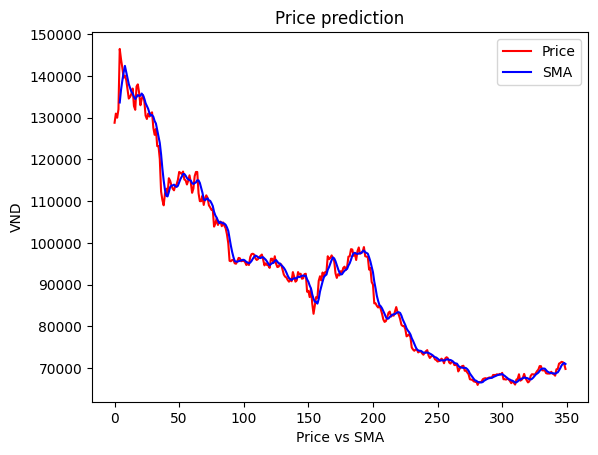

In [76]:
plt.plot(df['Price'], color='red', label='Price')
plt.plot(df['SMA'], color='blue', label='SMA')
plt.title("Price prediction")
plt.xlabel("Price vs SMA")
plt.ylabel("VND")
plt.legend()

In [77]:
# Mean Absolute Percentage Error
mape = abs(df["Price"] - df["SMA"])*100/df["Price"]
mape = mape.mean()
mape

1.197476448830438

# Linear Regression

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      350 non-null    datetime64[ns]
 1   Price     350 non-null    float64       
 2   Open      350 non-null    float64       
 3   High      350 non-null    float64       
 4   Low       350 non-null    float64       
 5   Vol.      350 non-null    float64       
 6   Change %  350 non-null    float64       
 7   SMA       346 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 22.0 KB


In [79]:
# Convert 'Date' column to numeric values
df['Date'] = pd.to_numeric(df['Date'])

In [80]:
# Initialize a model
lm = LinearRegression()
X = df['Date'].values.reshape(-1, 1)
Y = df['Price'].values

In [81]:
lm.fit(X, Y)

LinearRegression()

In [82]:
Y_predict = lm.predict(X)

In [83]:
df["LinearRegression"] = Y_predict

In [84]:
df

,Date,Price,Open,High,Low,Vol.,Change %,SMA,LinearRegression
0,1718582400000000000,128800.0,131000.0,131400.0,128500.0,4870000.0,-0.0168,NaN,125311.793908
1,1718323200000000000,131000.0,130100.0,132600.0,129000.0,6410000.0,0.0077,NaN,124916.638823
2,1718236800000000000,130000.0,133700.0,133800.0,130000.0,8140000.0,-0.0152,NaN,124784.920461
3,1718150400000000000,132000.0,127900.0,132700.0,127800.0,11220000.0,-0.0990,NaN,124653.202099
4,1718064000000000000,146500.0,144300.0,146500.0,143100.0,6330000.0,0.0174,133660.0,124521.483737
...,...,...,...,...,...,...,...,...,...
345,1675036800000000000,71222.0,71648.0,71818.0,71222.0,1020000.0,-0.0036,69979.8,58925.739570
346,1674777600000000000,71477.0,71562.0,72754.0,71477.0,1310000.0,0.0012,70643.4,58530.584485
347,1674086400000000000,71392.0,70626.0,71648.0,70541.0,1530000.0,0.0060,70983.8,57476.837590
348,1674000000000000000,70967.0,69861.0,70967.0,69605.0,1100000.0,0.0171,71222.0,57345.119229


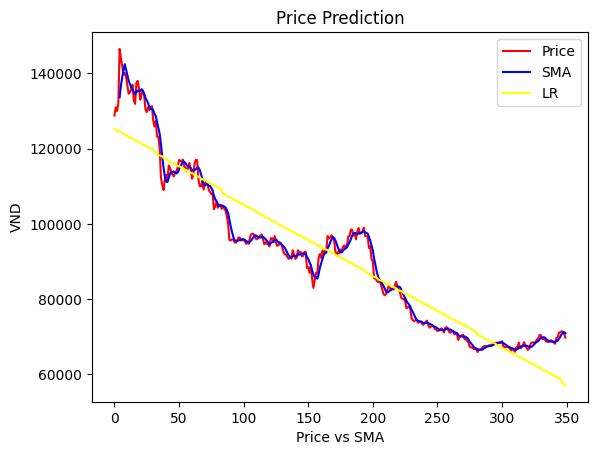

In [85]:
plt.plot(df['Price'], color='red', label='Price')
plt.plot(df['SMA'], color='blue', label='SMA')
plt.plot(df['LinearRegression'], color='yellow', label='LR')

plt.title("Price Prediction")
plt.xlabel("Price vs SMA")
plt.ylabel("VND")
plt.legend()

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [87]:
mse = mean_squared_error(df["Price"], Y_predict)
rmse = mean_squared_error(df["Price"], Y_predict, squared=False)
mae = mean_absolute_error(df["Price"], Y_predict)
mape = mean_absolute_percentage_error(df["Price"], Y_predict)

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [88]:
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape*100}%")

Mean Squared Error: 44224926.16892653
Root Mean Squared Error: 6650.18241621435
Mean Absolute Error: 5407.333157964084
Mean Absolute Percentage Error: 5.910217881910568%
